###### U20EC147
# Experiment 9
### Aim : Design a CNN deep learning model and train it on Cifar10 dataset.

In [ ]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = np.reshape(x_train, (-1,32,32,3)).astype(float) / 255
x_test = np.reshape(x_test, (-1,32,32,3)).astype(float) / 255
y_train = np.array(y_train).astype(float)
y_test = np.array(y_test).astype(float)

170498071/170498071 [==============================] - 13s 0us/step


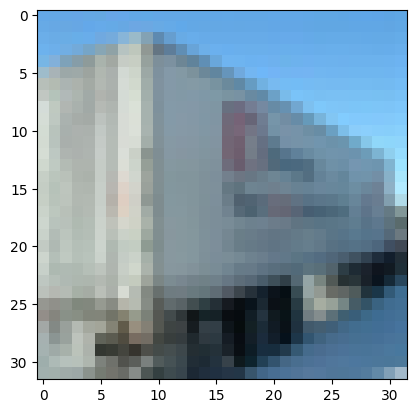

In [ ]:
plt.imshow(x_train[15])

In [ ]:
model = Sequential()
model.add(Conv2D(32, 3, (1,1), use_bias=True, activation='relu', padding='valid', input_shape=(32,32,3)))
model.add(Conv2D(32, 3, (1,1), use_bias=True, activation='relu', padding='valid'))
model.add(Conv2D(32, 3, (1,1), use_bias=True, activation='relu', padding='valid'))
model.add(Conv2D(32, 3, (1,1), use_bias=True, activation='relu', padding='valid'))
model.add(MaxPooling2D((2,2), 2))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, (1,1), use_bias=True, activation='relu', padding='valid'))
model.add(Conv2D(32, 3, (1,1), use_bias=True, activation='relu', padding='valid'))
model.add(MaxPooling2D((2,2), 2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 32)        128       
 Normalization)                                         

In [ ]:
ip = np.random.rand(1,32,32,3)
model(ip).shape

TensorShape([1, 10])

In [ ]:
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
782/782 [==============================] - 12s 8ms/step - loss: 1.5153 - acc: 0.4579
Epoch 2/100
782/782 [==============================] - 6s 7ms/step - loss: 1.1096 - acc: 0.6064
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 0.9393 - acc: 0.6690
Epoch 4/100
782/782 [==============================] - 6s 7ms/step - loss: 0.8265 - acc: 0.7081
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 0.7549 - acc: 0.7341
Epoch 6/100
782/782 [==============================] - 6s 7ms/step - loss: 0.6999 - acc: 0.7531
Epoch 7/100
782/782 [==============================] - 6s 8ms/step - loss: 0.6414 - acc: 0.7735
Epoch 8/100
782/782 [==============================] - 6s 7ms/step - loss: 0.5996 - acc: 0.7895
Epoch 9/100
782/782 [==============================] - 7s 8ms/step - loss: 0.5579 - acc: 0.8030
Epoch 10/100
782/782 [==============================] - 6s 7ms/step - loss: 0.5255 - acc: 0.8131
Epoch 11/100
782/782 [================

In [ ]:
model.evaluate(x_test,y_test)[-1]

313/313 [==============================] - 2s 5ms/step - loss: 2.6933 - acc: 0.7018


0.7017999887466431